# DETECCCION DE ROSTROS USANDO MACHINE LEARNING

By: Felipe Mantilla

El objetivo de este notebook es explicar como funciona y como se implementa un algoritmo de deep learning para poder reconocer los rostros de una persona (en este caso mi rostro). La guía explica configuracion, recoleccion de datos, etiquetado y la red neuronal que se utilizó para esta aplicación. Este notebook sigue el tutorial de Nicholas Renotte en su video de Youtube "Build a Deep Face Detection Model with Python and Tensorflow"

### Paso 1 - Instalar dependencias y configuraciones

Para esta aplicación se usará:

- Labelme: Herramienta utilizada para etiquetar imagenes. https://github.com/wkentaro/labelme
- tensorflow: Librería para aprendizaje automático: https://www.tensorflow.org/?hl=es-419
- opencv: Librería de vision por computador: https://opencv.org/
- matplotlib: librería de python para creacion de graficos y visualiaciones: https://matplotlib.org/
- albumentations: librería de python para aumento de imagenes en un dataset: https://albumentations.ai/

In [1]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

  Using cached albumentations-1.3.0-py3-none-any.whl (123 kB)
  Using cached scikit_image-0.20.0-cp311-cp311-win_amd64.whl (23.7 MB)
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Using cached opencv_python_headless-4.7.0.72-cp37-abi3-win_amd64.whl (38.1 MB)
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
     ---------------------------------------- 3.4/3.4 MB 1.9 MB/s eta 0:00:00
  Using cached tifffile-2023.4.12-py3-none-any.whl (219 kB)
  Using cached PyWavelets-1.4.1-cp311-cp311-win_amd64.whl (4.2 MB)
  Using cached lazy_loader-0.2-py3-none-any.whl (8.6 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Adicional a estas librerías, en la ruta donde se está ejecutando este cuaderno se debe crear una serie de Carpetas donde se almacenará las imagenes en un primer momento. Luego se moverán a los diferentes conjuntos de datos que necesitamos para crear el algoritmo. De este modo quedarían las carpetas:

<img width=200px src='ref\1.png'>

### Paso 2 - Recolección de imágenes usando OpenCV

In [10]:
#Libraries for the script
import os
import time
import uuid
import cv2

Se crea la ruta donde se va a guardar las imagenes que serán usadas para el algoritmo. Además, se tomarán 3 rondas de 30 imágenes para un total de 90 imagenes de mi rostro usando la cámara de mi computador (en mi caso un portatil)

In [8]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [130]:
!pip install opencv-python


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

*cv2.Videocapture(0)* inicializa la cámara predeterminada del equipo. En caso de tener otra cámara conectada el parametro puede variar. Luego se inicia un bucle para la captura de imagenes. El bucle se repetirá el número de veces que establecimos en la variable *numer_images*. el comando *ret,frame = cap.read()* lee un frame de la cámara en ese momento (lo mismo que decir que toma una fotografía). *imgname* es una variable que contiene un UUID (Universally Unique Identifier) para crear un nombre para la imagen que capturamos y agregarlo a la ruta a traves del comando *os.path.join()*. El frame es guardada a través de *cv.imwrite*. Este  recibe dos parametros: imgname que contiene la ruta y el nombre único de la imagen y frame que contiene la imagen capturada. Finalmente, se repite la captura de imágenes cada 0.5 segundos. 

### Paso 3 - Marcar Imágenes con LabelMe

En mi caso, al momento de inicializar labelme, me faltaba instalar otro paquete de librería para poder ejecutar la interfaz gráfica. Esto se solucionó instalando PyQt5 y reinstalando labelme

In [9]:

!pip install PyQt5
!pip install labelme

  Using cached labelme-5.2.1-py3-none-any.whl
  Using cached imgviz-1.7.2-py3-none-any.whl (7.7 MB)
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached natsort-8.3.1-py3-none-any.whl (38 kB)
  Using cached Pillow-9.5.0-cp311-cp311-win_amd64.whl (2.5 MB)
  Using cached PyYAML-6.0-cp311-cp311-win_amd64.whl (143 kB)
  Using cached QtPy-2.3.1-py3-none-any.whl (84 kB)
  Using cached contourpy-1.0.7-cp311-cp311-win_amd64.whl (162 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Ejecutamos labelme

In [7]:
!labelme

Al enviar el comando anterior, abrirá una interfaz gráfica para etiquetar imagenes. La interfaz es muy sencilla de utilizar. En el video de Nicholas Renotte que mencioné al principio de este cuaderno se puede ver como realiza este procedimiento( del minuto 21:18 al minuto 32:32)

En resumen. En este procedimiento (manual y que llevará tiempo) se empieza a etiquetar cada una de las imagenes que tomamos del script anterior,y la herramienta irá guardando en un archivo .json con el nombre de la imagen, las coordenadas del cuadro que encierra la cara de cada uno de los frames
<img width=650px src='ref\2.png'>

### Pase 4 - Restringir el uso de GPU para evitar OOM

In [15]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.8.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached jax-0.4.10-py3-none-any.whl
  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl (14.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.23.1-cp310-abi3-win_amd64.whl (422 kB)
  Using cached grpcio-1.54.2-cp311-cp311-win_amd64.whl (4.1 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached ml_dtypes-0.1.0-cp311-cp311-win_amd64.whl (120 kB)
  Using cached goo

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\karen\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [112]:
#More libraries
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

Los errores de OOM en la GPU (Out of memory) ocurren cuando un programa o sistema se queda sin memoria en la unidad de procesamiento gráfica (GPU) disponible para completar una determinada tarea. Cuando esto ocurre puede provocar que el programa se bloquee o se cierre de manera inesperada. En el aprendizaje automático y el procesamiento de datos, es común trabajar con conjuntos de datos grandes y modelos complejos que requieren una cantidad considerable de memoria para su procesamiento. Cuando se ejecuta un programa que utiliza la GPU, puede haber ocasiones en las que la cantidad de memoria necesaria para realizar una operación excede la memoria disponible en la GPU. La configuración proporcionada en el siguiente código tiene como objetivo precisamente evitar errores OOM al permitir que la memoria de la GPU crezca dinámicamente según las necesidades del programa.

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

Para ver la lista de GPUs:

In [3]:
tf.config.list_physical_devices('GPU')

[]

### Paso 5 - Cargue de imagenes dentro de un TF Data Pipeline

Un pipeline de datos en TensorFlow es como una línea de ensamblaje que procesa datos de entrada para que sean adecuados para su uso en un modelo de aprendizaje automático. El siguiente comando crea el dataset conformado por todos los archivos .jpg que se encuentren en la carpeta \data\images:

In [21]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg') #Crear el dataset

Para verificar:

In [22]:
images.as_numpy_iterator().next()

b'data\\images\\c3314352-f8bb-11ed-8662-8c8caaf81fa5.jpg'

In [34]:
def load_image(x): 
    byte_img = tf.io.read_file(x) # Lee el archivo de imagen en bytes
    img = tf.io.decode_jpeg(byte_img) # Decodifica la imagen en formato JPEG
    return img

In [24]:
images = images.map(load_image)  #Aplicamos la funcion en el conjunto de datos

In [25]:
images.as_numpy_iterator().next()

array([[[ 10,   8,  19],
        [ 10,   8,  19],
        [  9,   9,  17],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  83],
        [ 83,  83,  85]],

       [[ 11,   9,  20],
        [ 11,   9,  20],
        [ 10,  10,  18],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  83],
        [ 83,  83,  85]],

       [[  9,   9,  17],
        [  8,   8,  16],
        [  8,   8,  16],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  81],
        [ 84,  84,  84]],

       ...,

       [[ 97,  98,  92],
        [ 96,  97,  91],
        [ 96,  95,  90],
        ...,
        [ 98, 101, 116],
        [103, 104, 122],
        [107, 108, 128]],

       [[100, 101,  95],
        [ 96,  97,  91],
        [ 94,  94,  86],
        ...,
        [ 94,  97, 112],
        [ 97, 100, 117],
        [101, 104, 123]],

       [[ 99, 100,  94],
        [ 98,  99,  93],
        [ 98,  98,  90],
        ...,
        [ 94,  97, 112],
        [ 95,  98, 117],
        [ 99, 102, 121]]

In [26]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### Paso 6 - Ver imágenes sin procesar con Matplotlib

In [30]:
image_generator = images.batch(4).as_numpy_iterator()

In [31]:
plot_images = image_generator.next()

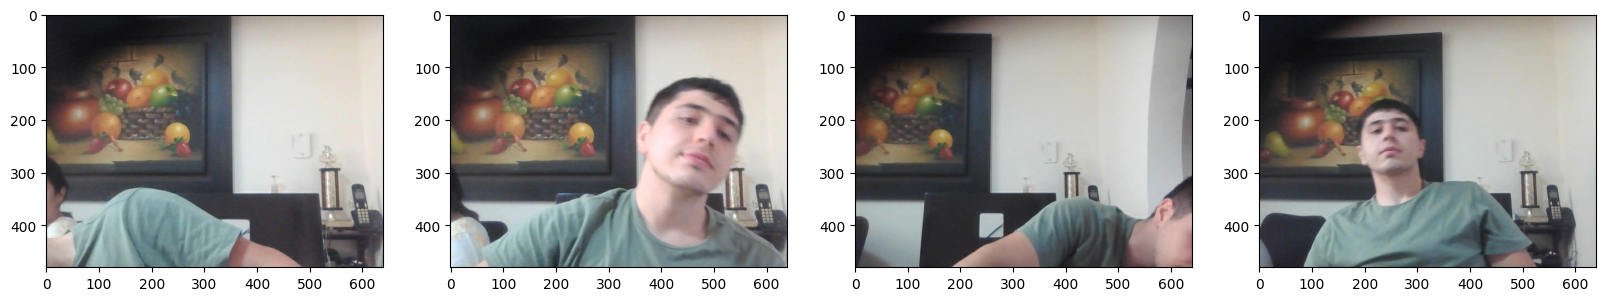

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

### Paso 7 - Partición de datos no aumentados

A continuación manualmente se moveran las imagenes en los tres tipos de conjuntos:  Entrenamiento, Test y Validación. El 70 % de los datos será destinado al conjunto de entrenamiento. el 15% al conjunto de testeo y el 15% restante a la validación

In [4]:
90*.7 # 63 to train

62.99999999999999

In [5]:
90*.15 # 14 and 13 to test and val

13.5

### Paso 8 - Mover los datos etiquetados a las carpetas correspondientes

In [33]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

El código proporcionado recorre tres carpetas (train, test y val) y para cada carpeta, busca archivos en el directorio de imágenes. Luego, verifica si existe un archivo JSON correspondiente en la carpeta de etiquetas. Si el archivo JSON existe, lo mueve a la carpeta correspondiente (train, test o val) para mantener la consistencia entre los archivos de imagen y los archivos JSON en cada carpeta.

### Paso 9 Aplicar aumento de imagen en imágenes y etiquetas usando albumentations

#### Configuracion 

In [4]:
import cv2
import os

Validando el tamaño de las imagenes tomadas para verificar parametros al usar albumentation

In [14]:
img = cv2.imread(os.path.join('data','train','images','2a55627d-f8bb-11ed-a7b7-8c8caaf81fa5.jpg'))
img.shape

(480, 640, 3)

In [8]:
import albumentations as alb

el siguiente código define una secuencia de transformaciones que se aplicarán a las imágenes de entrada. Estas transformaciones incluyen recortes aleatorios, volteos horizontales y verticales, ajustes de brillo y contraste, cambios de gamma y cambios aleatorios en los canales RGB de la imagen. Estas transformaciones ayudan a aumentar la diversidad de los datos de entrenamiento y mejorar la capacidad del modelo para generalizar a nuevas imágenes.

In [9]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### Paso 10 - Cargar y testear una imagen y su anotacion con openCV y Json

In [15]:
img

array([[[ 28,  29,  27],
        [ 29,  30,  28],
        [ 30,  31,  29],
        ...,
        [173, 188, 191],
        [173, 188, 191],
        [172, 187, 190]],

       [[ 30,  28,  27],
        [ 29,  30,  28],
        [ 29,  30,  28],
        ...,
        [173, 188, 191],
        [173, 188, 191],
        [173, 188, 191]],

       [[ 33,  29,  28],
        [ 30,  28,  27],
        [ 30,  28,  28],
        ...,
        [175, 187, 191],
        [175, 188, 190],
        [176, 189, 191]],

       ...,

       [[242, 232, 208],
        [243, 233, 209],
        [242, 235, 210],
        ...,
        [130, 130, 124],
        [161, 162, 153],
        [187, 188, 179]],

       [[238, 231, 204],
        [241, 234, 207],
        [239, 232, 205],
        ...,
        [134, 134, 128],
        [170, 168, 160],
        [189, 187, 179]],

       [[238, 232, 203],
        [239, 233, 204],
        [233, 227, 198],
        ...,
        [134, 134, 128],
        [174, 172, 164],
        [191, 189, 181]]

In [18]:
with open(os.path.join('data', 'train', 'labels', '2a55627d-f8bb-11ed-a7b7-8c8caaf81fa5.json'), 'r') as f:
    label = json.load(f)

In [20]:
label

{'version': '5.2.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[170.5128205128205, 109.23076923076924],
    [402.8205128205128, 419.4871794871795]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\2a55627d-f8bb-11ed-a7b7-8c8caaf81fa5.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRo

Hasta este punto logramos cargar el .json relacionado con la imagen de testeo. este archivo contiene las coordenadas de la anotacion correspondiente al rostro. y se puede ver cuales son las coordenadas siguiento el siguiente codigo:

In [21]:
label['shapes'][0]['points']

[[170.5128205128205, 109.23076923076924],
 [402.8205128205128, 419.4871794871795]]

### Paso 11 - Extraer las coordenadas y reescalar la resolucion de la imagen

In [22]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [23]:
coords

[170.5128205128205, 109.23076923076924, 402.8205128205128, 419.4871794871795]

De acuerdo con la documentacion de albumentation, para definir los cuadros delimitadores requiere conocer cuatro valores: [x_min, y_min, x_max, y_max] (por ejemplo, las coordenadas del ejemplo anterior almacenadas en la variable coord). Estos valores deben estar normalizados. Para normalizar los valores, dividimos las coordenadas en píxeles para los ejes x e y por el ancho y el alto de la imagen. La siguiente imagen muestra una representación sobre el cuadro delimitador con valores normalizados:

<img width=650px src='ref\3.png'>

In [24]:
coords = list(np.divide(coords, [640,480,640,480]))

In [25]:
coords

[0.26642628205128205,
 0.2275641025641026,
 0.6294070512820513,
 0.8739316239316239]

### Paso 12 - Aplicar Augmentation y ver resultados

In [26]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [27]:
augmented['bboxes'][0][2:]

(0.704045584045584, 0.88997150997151)

In [28]:
augmented['bboxes']

[(0.18780626780626777,
  0.20051282051282054,
  0.704045584045584,
  0.88997150997151)]

el siguiente código dibuja un rectángulo delimitador (bounding box) en una imagen aumentada utilizando las coordenadas proporcionadas por augmented['bboxes']. Luego, muestra la imagen con el rectángulo utilizando plt.imshow(). Esto permite visualizar el efecto de las transformaciones de aumento de datos en la imagen y cómo se ajusta el cuadro delimitador.

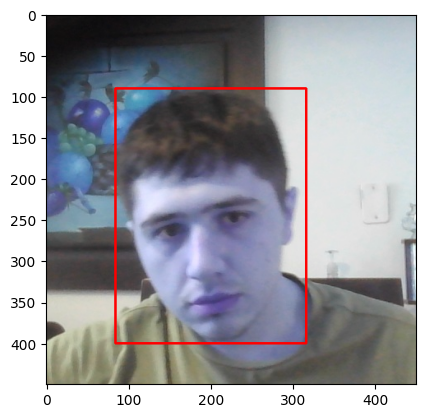

In [29]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

La imagen se ve azul, debido a que matplotlib lee la imagen en formato RGB mientras que open cv lee la imagen en BGR

### Paso 13 - Contruir y correr el Pipeline de Aumento de imágenes

El siguiente código tiene como objetivo aplicar el paso 11 en todas las imagenes de las particiones *train*, *test* y *val*.  Luego por cada imagen la carpeta, se va a crear 60 mas usando albumentation, tal como se realizó en el paso 12. Antes de ejecutar esta celda, debemos crear una carpeta llamada *aug_data* donde se almacenará las imagenes guardadas. Al igual que la carpeta *data* se debe crear tres carpetas train, test y val; y en cada una de ellas deben haber dos carpetas de images y labels.

<img width=300px src='ref\4.png'>

In [30]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.6951121794871795, 0.591880341880342, 0.33613782051282054, 0.00747863247863248, 'face'].
x_max is less than or equal to x_min for bbox [0.7584134615384616, 0.7222222222222222, 0.3449519230769231, 0.01388888888888889, 'face'].
x_max is less than or equal to x_min for bbox [0.7119391025641026, 0.7542735042735044, 0.33293269230769235, 0.060897435897435896, 'face'].
x_max is less than or equal to x_min for bbox [0.6798878205128205, 0.841880341880342, 0.3657852564102564, 0.2232905982905983, 'face'].
x_max is less than or equal to x_min for bbox [0.6975160256410257, 0.8151709401709403, 0.3529647435897436, 0.21153846153846156, 'face'].
x_max is less than or equal to x_min for bbox [0.8794070512820514, 0.8803418803418804, 0.5084134615384615, 0.2168803418803419, 'face'].
x_max is less than or equal to x_min for bbox [0.20392628205128202, 0.48717948717948717, 0.0012274639423076827, 0.9979166666666667, 'face'].
x_max is less than or equal to x_min f

### Paso 14 Cargar las imágenes aumentadas al Tensorflow Dataset

In [35]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [36]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [37]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [38]:
train_images.as_numpy_iterator().next()

array([[[0.68829656, 0.7049632 , 0.6298407 ],
        [0.6836397 , 0.6996936 , 0.6234069 ],
        [0.6874387 , 0.69920343, 0.6276348 ],
        ...,
        [0.02794118, 0.07107843, 0.05539216],
        [0.02892157, 0.07205883, 0.05637255],
        [0.03590686, 0.07757353, 0.06629902]],

       [[0.70373774, 0.7076593 , 0.6449142 ],
        [0.7058824 , 0.7176471 , 0.65      ],
        [0.69846815, 0.7146446 , 0.6465074 ],
        ...,
        [0.02003676, 0.06317402, 0.04748775],
        [0.01954657, 0.06268382, 0.04699755],
        [0.01685049, 0.05606618, 0.05214461]],

       [[0.71047795, 0.7143995 , 0.6438113 ],
        [0.7132353 , 0.725     , 0.6426471 ],
        [0.70441175, 0.7240196 , 0.6338848 ],
        ...,
        [0.03572304, 0.0788603 , 0.06317402],
        [0.03137255, 0.07450981, 0.05882353],
        [0.01727941, 0.05894608, 0.04767157]],

       ...,

       [[0.32806373, 0.43645832, 0.422549  ],
        [0.33982843, 0.43768382, 0.4254902 ],
        [0.32107842, 0

### Paso 15 - Preparar Etiquetas

Esta es una función llamada load_labels que carga las etiquetas de un archivo en formato JSON y devuelve la clase y el cuadro delimitador asociados.

In [39]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [40]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [41]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [42]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

el código carga los archivos de etiquetas en formato JSON en un conjunto de datos de TensorFlow y aplica la función load_labels a cada archivo para obtener la clase y el cuadro delimitador asociados a las etiquetas. Estos datos se representan con tipos de datos específicos (tf.uint8 y tf.float16) para su uso posterior en el entrenamiento del modelo de aprendizaje automático.

In [46]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2205, 0.2072, 0.737 , 0.8965], dtype=float16))

### Paso 16 - Combinar labels con las imágenes

En nuestra aplicacion tenemos las imágenes en un lado y las etiquetas en otro, el objetivo en este paso es combinarlos.

Primero verificamos la longitud de las particiones

In [47]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(2340, 2340, 660, 660, 660, 660)

  Creando nuestro dataset final (Images/Labels)

In [48]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [49]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [50]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [51]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.294 , 0.2954, 0.5127, 0.5303],
        [0.    , 0.2612, 0.424 , 0.8423],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.1531, 0.4314, 0.7334],
        [0.    , 0.3677, 0.265 , 0.714 ],
        [0.    , 0.559 , 0.0975, 0.997 ],
        [0.1716, 0.2135, 0.649 , 0.839 ],
        [0.    , 0.3162, 0.1915, 1.    ]], dtype=float16))

Ver imagenes y las anotaciones:

In [52]:
data_samples = train.as_numpy_iterator()

In [57]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


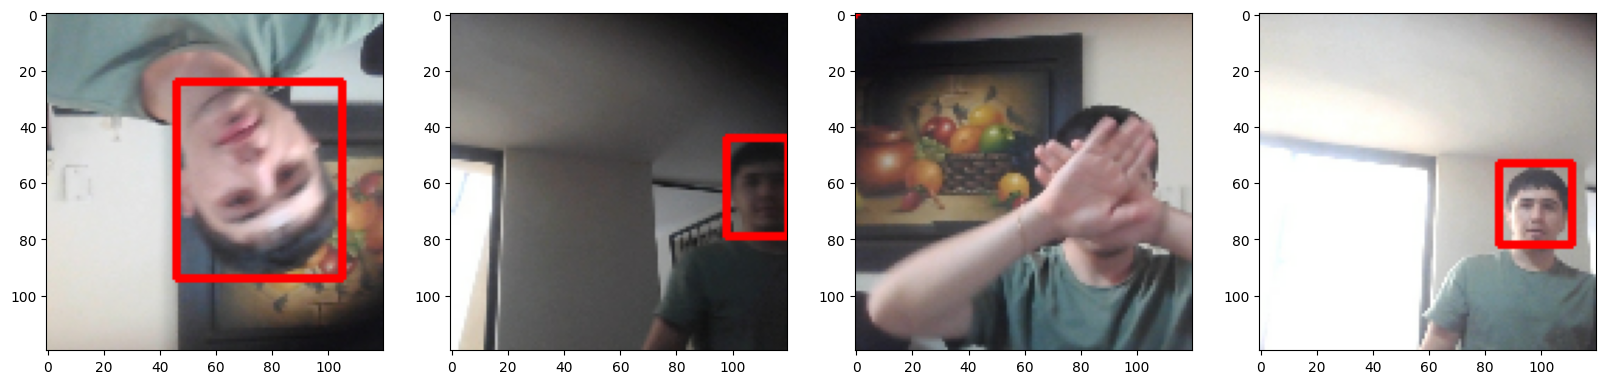

In [58]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# SEGUNDA PARTE: CONSTRUIR Y ENTRENAR EL MODELO DE DEEP LEARNING

(the fun part)

### 1 - Capas de importación y red de base

In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 2 - Descargar VGG16

 VGG16 es una red neuronal convolucional con 16 capas que se utiliza para el reconocimiento de objetos en imágenes. Su diseño profundo y uniforme, junto con su buen rendimiento, la han convertido en una arquitectura popular en el campo de la visión por computadora.

In [60]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [61]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

VGG16 es una red neuronal convolucional (CNN) diseñada para el reconocimiento de objetos en imágenes. Consta de 16 capas, cada una con filtros convolucionales que extraen características de la imagen. Su arquitectura profunda y uniforme la hace popular en la visión por computadora.

En VGG16, los filtros son matrices de pesos que se desplazan sobre la imagen, realizando operaciones de convolución para detectar patrones y detalles relevantes. A medida que se profundiza en la red, los filtros aprenden características más complejas.

Los filtros se ajustan durante el entrenamiento para maximizar la capacidad de la red para reconocer patrones en los datos de entrenamiento. Cada capa convolucional puede tener múltiples filtros especializados en detectar diferentes características.

<img width=600px src='ref\5.png'>

### 3 - Crear una instancia de Red

Este fragmento de código construye un modelo utilizando VGG16 como base y agrega capas personalizadas para realizar tareas de clasificación y detección de cajas delimitadoras en imágenes. (Una tarea de clasificacion para detectar caras y una tarea de regresión para dibujar el delimitador)

In [62]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 4 - Comprobar Red neuronal

In [63]:
facetracker = build_model()

In [64]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [65]:
X, y = train.as_numpy_iterator().next()

In [66]:
X.shape

(8, 120, 120, 3)

In [67]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 554ms/step


In [68]:
classes, coords

(array([[0.30704233],
        [0.36471626],
        [0.50476617],
        [0.3755439 ],
        [0.34338892],
        [0.34144816],
        [0.38288438],
        [0.35474327]], dtype=float32),
 array([[0.6664134 , 0.61717606, 0.50303096, 0.4955849 ],
        [0.6552442 , 0.54150337, 0.4816309 , 0.45980826],
        [0.66789484, 0.6250758 , 0.48035   , 0.510864  ],
        [0.56707495, 0.5949935 , 0.48169687, 0.54158294],
        [0.5298097 , 0.62572724, 0.4679216 , 0.47364497],
        [0.6154524 , 0.60386467, 0.41690084, 0.57815397],
        [0.55287325, 0.6424034 , 0.502475  , 0.4898929 ],
        [0.5933275 , 0.57828826, 0.4438989 , 0.44999498]], dtype=float32))

### 5 - Definir pérdidas y optimizadores

In [69]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

En esta fórmula, (1./0.75 - 1) representa la disminución deseada en la tasa de aprendizaje, donde 0.75 es el factor de decaimiento. Dividir esto por el número de lotes por época proporciona la tasa de decaimiento específica para cada lote.

El valor de lr_decay se utiliza típicamente en algoritmos de optimización para reducir gradualmente la tasa de aprendizaje durante el entrenamiento. Esto puede ser útil para ayudar al modelo a converger de manera más eficiente hacia una solución óptima.

In [71]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

el código crea un objeto de optimizador Adam en TensorFlow Keras con una tasa de aprendizaje inicial y una tasa de decaimiento calculada previamente. Este optimizador se utilizará durante el entrenamiento del modelo para ajustar los pesos y mejorar su rendimiento.

### 6 -  Crear pérdida de localización y pérdida de clasificación

esta función calcula la pérdida de localización para las cajas delimitadoras verdaderas y predichas. Ayuda a evaluar cuánto se desvían las predicciones de las cajas delimitadoras respecto a las cajas delimitadoras verdaderas.

In [72]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [73]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

La función BinaryCrossentropy es una función de pérdida comúnmente utilizada en problemas de clasificación binaria. Se utiliza para calcular la pérdida entre las etiquetas verdaderas y las predicciones de clasificación. En este caso, se crea un objeto classloss que se utilizará para calcular la pérdida de clasificación en el modelo.

Por otro lado, regressloss se refiere a la función localization_loss definida previamente. Esta función calcula la pérdida de localización para las cajas delimitadoras verdaderas y predichas. Se utiliza para evaluar la discrepancia en la ubicación y tamaño de las cajas delimitadoras.

### 7 - Comprobar las métricas de pérdidas

In [74]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.198815>

In [75]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8475598>

In [76]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.198815>

### 8 - Entrenar la red neuronal

In [77]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

La pérdida total se calcula como la suma ponderada de la pérdida de localización (batch_localizationloss) y la mitad de la pérdida de clasificación (batch_classloss). Esto se almacena en la variable total_loss.

define un modelo de seguimiento facial que utiliza otro modelo (eyetracker) como base. Proporciona métodos para entrenar y evaluar el modelo, y puede utilizarse para realizar predicciones utilizando el método call.

In [78]:
model = FaceTracker(facetracker)

In [79]:
model.compile(opt, classloss, regressloss)

### 9 - Correr el entrenamiento

In [80]:
logdir='logs'

In [81]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [82]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
293/293 [==============================] - 441s 1s/step - total_loss: 0.7001 - class_loss: 0.2224 - regress_loss: 0.5889 - val_total_loss: 0.1133 - val_class_loss: 0.0737 - val_regress_loss: 0.0765
Epoch 2/10
293/293 [==============================] - 421s 1s/step - total_loss: 0.1332 - class_loss: 0.0454 - regress_loss: 0.1105 - val_total_loss: 0.0269 - val_class_loss: 2.7785e-04 - val_regress_loss: 0.0267
Epoch 3/10
293/293 [==============================] - 3537s 12s/step - total_loss: 0.0695 - class_loss: 0.0309 - regress_loss: 0.0541 - val_total_loss: 0.0541 - val_class_loss: 0.0047 - val_regress_loss: 0.0518
Epoch 4/10
293/293 [==============================] - 438s 1s/step - total_loss: 0.0852 - class_loss: 0.0388 - regress_loss: 0.0658 - val_total_loss: 0.0246 - val_class_loss: 0.0216 - val_regress_loss: 0.0139
Epoch 5/10
293/293 [==============================] - 435s 1s/step - total_loss: 0.0686 - class_loss: 0.0276 - regress_loss: 0.0548 - val_total_loss: 0.0095 -

### 10 Plotear el rendimiento

In [83]:
hist.history

{'total_loss': [0.09430844336748123,
  0.04260394722223282,
  0.07349082827568054,
  0.011596081778407097,
  0.012222779914736748,
  0.0034096743911504745,
  0.006934432312846184,
  0.05076753348112106,
  0.004019059706479311,
  0.047986093908548355],
 'class_loss': [0.009930328465998173,
  0.0020061747636646032,
  0.07796014845371246,
  0.0010867126984521747,
  6.503204349428415e-05,
  0.0018239293713122606,
  0.0061201248317956924,
  0.018417121842503548,
  0.00011258692393312231,
  0.06827107816934586],
 'regress_loss': [0.08934327960014343,
  0.04160086065530777,
  0.03451075404882431,
  0.011052725836634636,
  0.012190263718366623,
  0.0024977095890790224,
  0.0038743698969483376,
  0.041558973491191864,
  0.003962766379117966,
  0.013850554823875427],
 'val_total_loss': [0.1133265495300293,
  0.026880474761128426,
  0.05414123460650444,
  0.0246458500623703,
  0.009488892741501331,
  1.3268275260925293,
  0.009976872242987156,
  0.01624106802046299,
  0.015782194212079048,
  0.01

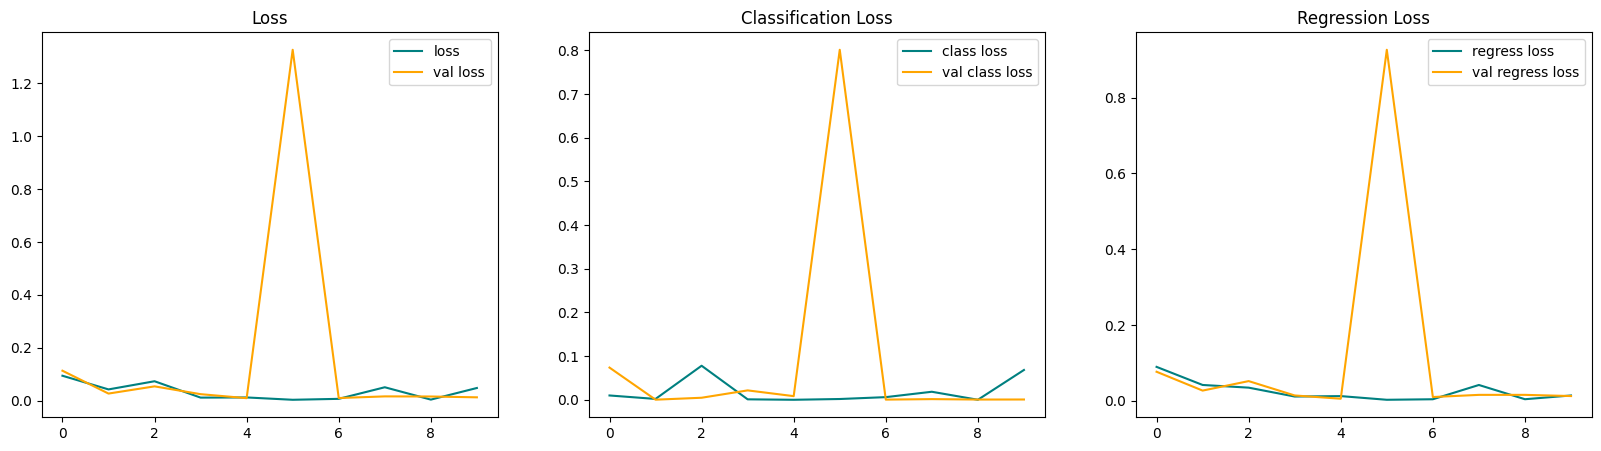

In [84]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. HACER PREDICCIONES

### 11.1 Predicciones en el set de entrenamiento

In [95]:
test_data = test.as_numpy_iterator()

In [105]:
test_sample = test_data.next()

In [106]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 388ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


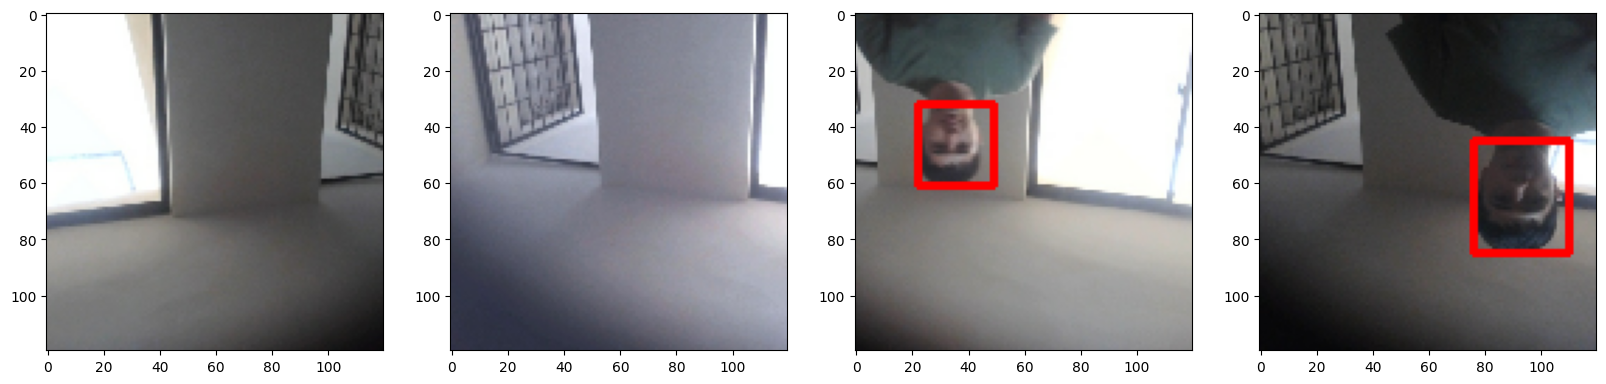

In [107]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Guardar el modelo

El modelo estará guardado como 'facetracker.h5'

In [4]:
from tensorflow.keras.models import load_model

In [108]:
facetracker.save('facetracker.h5')

In [5]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [6]:
!pip install tensorflow

     -------------------------------------- 272.9/272.9 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 524.5 kB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 466.1 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 24.4/24.4 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 587.7 kB/s eta 0:00:00
     -------------------------

  DEPRECATION: wrapt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Auxel\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\Auxel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 14.8/14.8 MB 5.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\Auxel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf


In [6]:

print("Cv2 imported")
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Cv2 imported
1/1 [==============================] - 0s 93ms/step


KeyboardInterrupt: 